In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
df = pd.read_csv('gold price.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#no. of rows and columns 
df.shape

(2290, 6)

In [5]:
#basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#checking the missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#getting statistical measure of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
#Sppilitting the data 
X = df.drop(['Date','GLD'], axis = 1)

In [9]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [10]:
Y = df['GLD']
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [13]:
#Model training: Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
regressor = RandomForestRegressor(n_estimators = 100)

In [16]:
#training the model
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
#model evalution (Prediction on test data)
test_data_prediction = regressor.predict(X_test)
test_data_prediction

array([168.65499928,  82.15369979, 116.07220018, 127.69180095,
       120.7359012 , 154.82559704, 150.62719842, 126.11610033,
       117.55269884, 125.93560073, 116.73180085, 171.63930145,
       141.59539785, 168.19909878, 115.29430025, 117.85800072,
       139.00780335, 170.2282012 , 159.21870205, 159.87129918,
       155.17270093, 125.1959    , 175.82659903, 156.86120336,
       125.23410051,  93.85110001,  77.17729988, 120.76689994,
       119.03179886, 167.37619966,  88.0629007 , 125.18300011,
        91.07820077, 117.75430023, 121.13399922, 136.26340046,
       115.40760114, 115.19280114, 148.31289885, 107.13140116,
       104.53230251,  87.27459793, 126.55700073, 117.81089989,
       154.32279923, 119.60500003, 108.36859997, 107.96469815,
        93.17420061, 127.05049787,  75.17090025, 113.60859898,
       121.2583    , 111.24619922, 118.82489902, 120.61419945,
       159.14629999, 167.72810137, 146.98639674,  86.08029872,
        94.22890037,  86.83589882,  90.40880051, 119.01

In [18]:
from sklearn import metrics

In [19]:
# R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
error_score

0.9890313774890227

In [20]:
#compare the actual value and the predicted values in plot
y_test = list(y_test)
y_test

[168.020004,
 81.230003,
 112.32,
 127.589996,
 119.620003,
 154.210007,
 148.910004,
 126.190002,
 117.470001,
 125.739998,
 115.379997,
 167.119995,
 141.630005,
 169.559998,
 115.599998,
 119.669998,
 132.949997,
 170.399994,
 159.369995,
 173.529999,
 154.720001,
 128.119995,
 177.720001,
 157.190002,
 125.309998,
 93.400002,
 76.790001,
 119.690002,
 118.989998,
 167.389999,
 87.5,
 124.980003,
 91.230003,
 115.489998,
 120.949997,
 133.809998,
 116.690002,
 113.809998,
 133.580002,
 105.970001,
 105.120003,
 87.959999,
 126.82,
 116.860001,
 159.259995,
 119.459999,
 109.160004,
 108.620003,
 93.269997,
 127.160004,
 72.260002,
 113.470001,
 119.68,
 109.139999,
 119.309998,
 120.050003,
 159.889999,
 161.490005,
 146.740005,
 85.809998,
 93.709999,
 85.550003,
 91.029999,
 118.489998,
 126.449997,
 126.980003,
 171.699997,
 122.400002,
 116.410004,
 97.959999,
 169.630005,
 142.639999,
 131.809998,
 121.360001,
 124.0,
 119.699997,
 113.889999,
 118.919998,
 105.639999,
 127.669

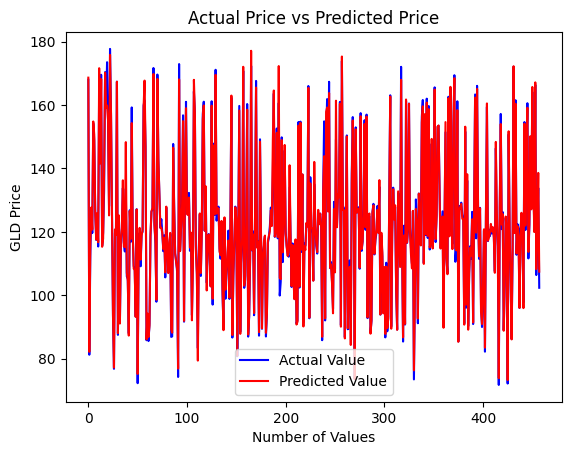

In [21]:
plt.plot(y_test, color = 'b', label = 'Actual Value')
plt.plot(test_data_prediction,color = 'r', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()